In [ ]:
!pip install cellpose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from cellpose import io, models, train
from skimage.io import imread
import matplotlib.pyplot as plt

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!git clone https://github.com/fjorka/OMIBS2025.git

Cloning into 'OMIBS2025'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 78 (delta 1), reused 4 (delta 0), pack-reused 69 (from 1)
Receiving objects: 100% (78/78), 170.42 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (39/39), done.


In [ ]:
io.logger_setup()

train_dir = r'./OMIBS2025/sample_images/train'
test_dir = r'./OMIBS2025/sample_images/test'

2025-08-18 20:57:23,437 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2025-08-18 20:57:23,438 [INFO] 
cellpose version: 	4.0.6 
platform:       	linux 
python version: 	3.11.13 
torch version:  	2.6.0+cu124


In [ ]:
model = models.CellposeModel(gpu=True)

output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_mask", look_one_level_down=False)

images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.1, learning_rate=3e-5,
                            n_epochs=100, model_name="my_model")

2025-08-18 20:58:10,661 [INFO] ** TORCH CUDA version installed and working. **
2025-08-18 20:58:10,662 [INFO] >>>> using GPU (CUDA)
2025-08-18 20:58:14,125 [INFO] >>>> loading model /root/.cellpose/models/cpsam
2025-08-18 20:58:14,728 [INFO] not all flows are present, running flow generation for all images
2025-08-18 20:58:14,844 [INFO] 13 / 13 images in ./OMIBS2025/sample_images/train folder have labels
2025-08-18 20:58:14,847 [INFO] not all flows are present, running flow generation for all images
2025-08-18 20:58:14,861 [INFO] 1 / 1 images in ./OMIBS2025/sample_images/test folder have labels
2025-08-18 20:58:14,863 [INFO] ** TORCH CUDA version installed and working. **
2025-08-18 20:58:14,864 [INFO] >>>> using GPU (CUDA)
2025-08-18 20:58:17,701 [INFO] >>>> loading model /root/.cellpose/models/cpsam
2025-08-18 20:58:18,650 [INFO] computing flows for labels


100%|██████████| 13/13 [00:05<00:00,  2.51it/s]

2025-08-18 20:58:23,908 [INFO] computing flows for labels


2025-08-18 20:58:24,266 [INFO] >>> computing diameters


100%|██████████| 1/1 [00:00<00:00, 40.28it/s]

2025-08-18 20:58:24,557 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-08-18 20:58:26,467 [INFO] >>> n_epochs=100, n_train=13, n_test=1
2025-08-18 20:58:26,468 [INFO] >>> AdamW, learning_rate=0.00003, weight_decay=0.10000
2025-08-18 20:58:26,471 [INFO] >>> saving model to /content/models/my_model
2025-08-18 20:58:40,847 [INFO] 0, train_loss=4.7031, test_loss=5.7188, LR=0.000000, time 14.38s
2025-08-18 20:59:52,204 [INFO] 5, train_loss=3.5812, test_loss=1.2188, LR=0.000017, time 85.73s
2025-08-18 21:01:03,008 [INFO] 10, train_loss=0.6535, test_loss=0.0089, LR=0.000030, time 156.54s
2025-08-18 21:03:25,096 [INFO] 20, train_loss=0.1845, test_loss=0.0109, LR=0.000030, time 298.63s
2025-08-18 21:05:47,221 [INFO] 30, train_loss=0.1138, test_loss=0.0101, LR=0.000030, time 440.75s
2025-08-18 21:08:09,275 [INFO] 40, train_loss=0.0966, test_loss=0.0092, LR=0.000030, time 582.80s
2025-08-18 21:10:30,729 [INFO] 50, train_loss=0.1731, test_loss=0.0073, LR=0.000015, time 724.26s
2025-08-18 21:12:52,737 [INFO] 60, train_loss=0.1241, test_loss=0.0071, LR=0.000004, t

In [ ]:
model_trained = models.CellposeModel(pretrained_model = './models/my_model',gpu=True)

2025-08-18 21:25:27,350 [INFO] ** TORCH CUDA version installed and working. **
2025-08-18 21:25:27,350 [INFO] >>>> using GPU (CUDA)
2025-08-18 21:25:29,831 [INFO] >>>> loading model ./models/my_model


In [ ]:
im = imread('./OMIBS2025/sample_images/test/014_img.tif')

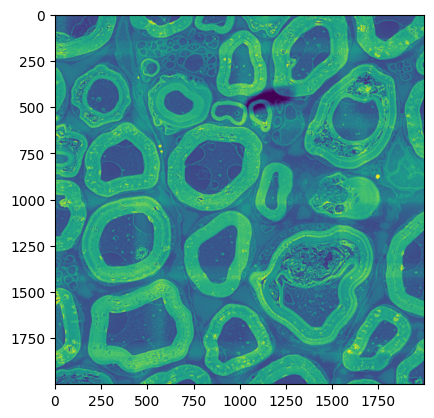

In [ ]:
plt.imshow(im)

In [ ]:
mask = model_trained.eval(im)

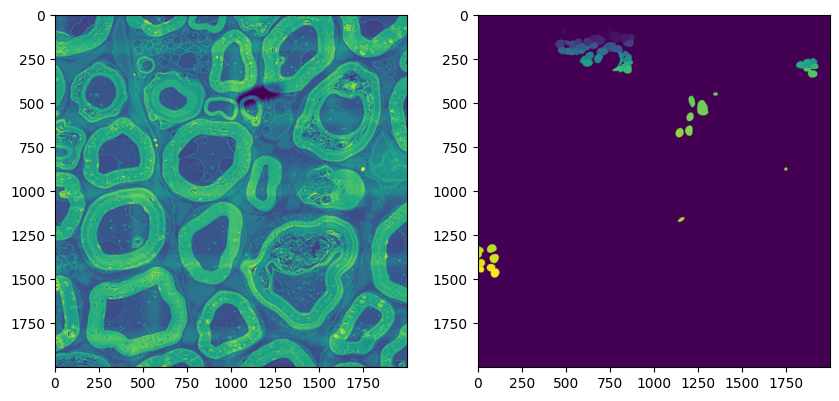

In [ ]:
plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(mask[0])